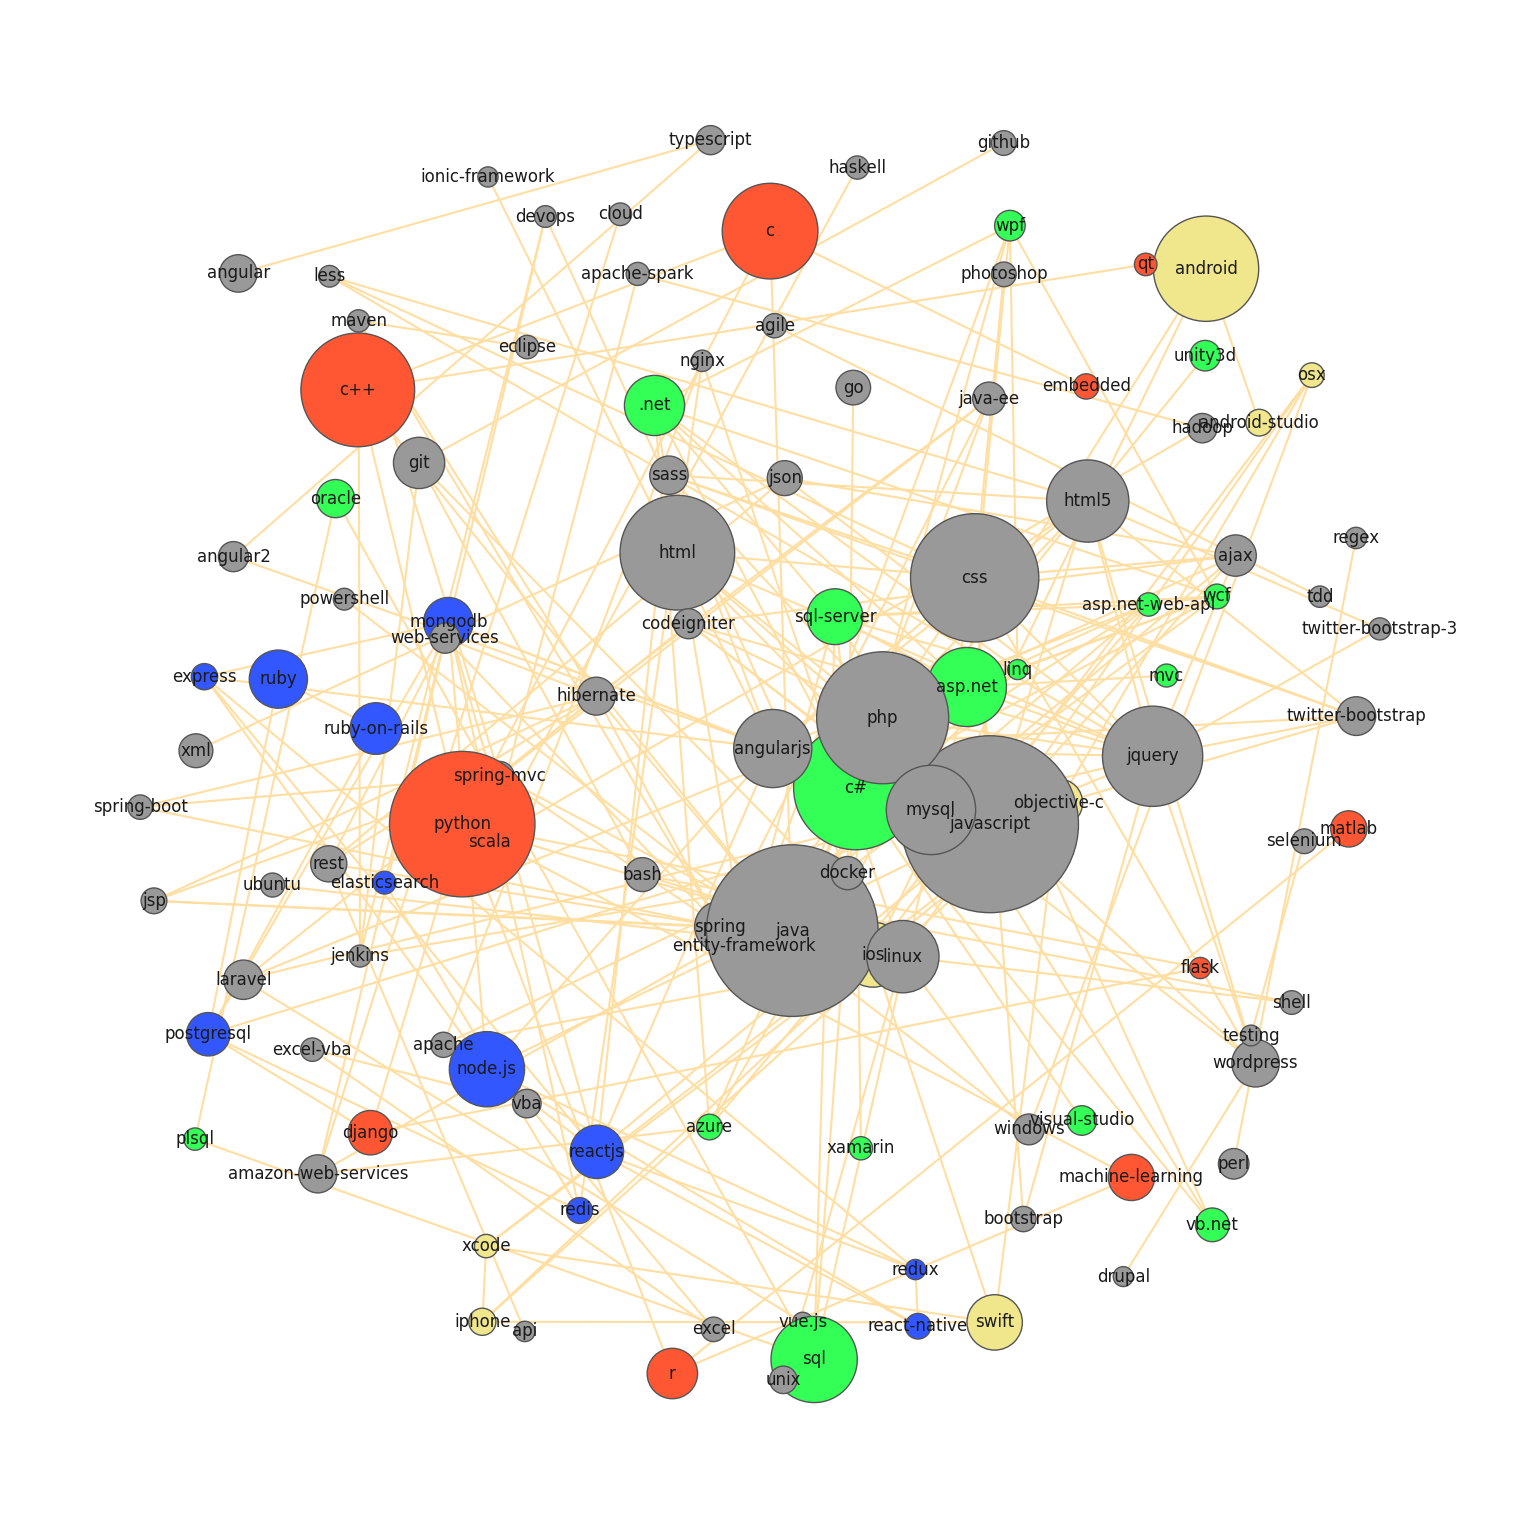

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('/content/stack_network_nodes.csv')
df_links = pd.read_csv('/content/stack_network_links.csv')

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
for index, row in df_links.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

color_map = {
    1: "#FF5733",  # red-orange
    2: "#33FF57",  # green
    3: "#3357FF",  # blue
    4: "#F0E68C"   # khaki
}

plt.figure(figsize=(15,15))
options = {
    'edge_color': '#FFDEA2',
    'width': 1.5,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map.get(G.nodes[node]['group'], "#999999") for node in G]
sizes = [G.nodes[node].get('nodesize', 1) * 25 for node in G]

nx.draw(
    G,
    node_color=colors,
    node_size=sizes,
    pos=nx.spring_layout(G, k=1.5, iterations=15),
    **options
)

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()